In [ ]:
%matplotlib inline


# Date Index Formatter


When plotting daily data, a frequent request is to plot the data
ignoring skips, e.g., no extra spaces for weekends.  This is particularly
common in financial time series, when you may have data for M-F and
not Sat, Sun and you don't want gaps in the x axis.  The approach is
to simply use the integer index for the xdata and a custom tick
Formatter to get the appropriate date string for a given index.



loading /home/ulysses/.local/lib/python3.7/site-packages/matplotlib/mpl-data/sample_data/msft.csv


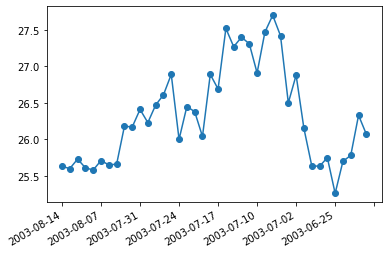

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.dates import bytespdate2num, num2date
from matplotlib.ticker import Formatter


datafile = cbook.get_sample_data('msft.csv', asfileobj=False)
print('loading %s' % datafile)
msft_data = np.genfromtxt(datafile, delimiter=',', names=True,
                          converters={0: bytespdate2num('%d-%b-%y')})[-40:]


class MyFormatter(Formatter):
    def __init__(self, dates, fmt='%Y-%m-%d'):
        self.dates = dates
        self.fmt = fmt

    def __call__(self, x, pos=0):
        'Return the label for time x at position pos'
        ind = int(np.round(x))
        if ind >= len(self.dates) or ind < 0:
            return ''

        return num2date(self.dates[ind]).strftime(self.fmt)

formatter = MyFormatter(msft_data['Date'])

fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(formatter)
ax.plot(np.arange(len(msft_data)), msft_data['Close'], 'o-')
fig.autofmt_xdate()
plt.show()